In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso,  LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.svm import SVC
import statsmodels.api as sm
%matplotlib inline

sns.set(style="darkgrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = load_boston() # load dataset

X = df.data
y = df.target
columns = df.feature_names


# **Linear regression**

1.[0.5 points] Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [3]:
df = pd.DataFrame(X, columns=columns)
X_train, X_test, y_train, y_test = train_test_split (df, y, test_size = 0.2, train_size=0.8, random_state=0)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)
df.head()

(404, 13) (404,)
(102, 13) (102,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


 2.Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure
*   LinearRegression;
*   Ridge with $\alpha = 0.01$;
*   Lasso with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [4]:
reg_line = LinearRegression()
reg_line.fit(X_train, y_train)

y_pred = reg_line.predict(X_test)
y_pred1 = reg_line.predict(X_train)

#Без StandartScaler
print('Without StandartScaler')
r_sqrt_test = reg_line.score(X_test,y_test)
print('Test R^2:{}'.format(r_sqrt_test))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
print('Test RMSE:{}'.format(rmse_test))
print()

r_sqrt_train = reg_line.score(X_train,y_train)
print('Train R^2:{}'.format(r_sqrt_train))
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred1))
print('Train RMSE:{}'.format(rmse_train))
print()

#StandartScaler
print('With StandartScaler')
scaler = StandardScaler()
X_train_standart = scaler.fit_transform(X_train)
X_test_standart = scaler.fit_transform(X_test)

reg_line.fit(X_train_standart, y_train)
y_predSTest = reg_line.predict(X_test_standart)
y_predSTrain = reg_line.predict(X_train_standart)

r_sqrt_test_st = reg_line.score(X_test_standart,y_test)
print('Test R^2:{}'.format(r_sqrt_test_st))
rmse_testSt=np.sqrt(mean_squared_error(y_test,y_predSTest))
print('Test RMSE:{}'.format(rmse_testSt))
print()

r_sqrt_train_st = reg_line.score(X_train_standart,y_train)
print('Train R^2:{}'.format(r_sqrt_train_st))
rmse_trainSt=np.sqrt(mean_squared_error(y_train,y_predSTrain))
print('Train RMSE:{}'.format(rmse_trainSt))
print() 

#Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_standart,y_train)

ridge_test = ridge.score(X_test_standart, y_test)
print('Test Ridge:',ridge_test)

ridge_train = ridge.score(X_train_standart, y_train)
print('Train Ridge:',ridge_train)
print()

#Lasso
la = Lasso(alpha=0.01)
la.fit(X_train_standart, y_train)

lasso_test = la.score(X_test_standart, y_test)
print('Test Lasso:',lasso_test)

lasso_train = la.score(X_train_standart, y_train)
print('Train Lasso:',lasso_train)

Without StandartScaler
Test R^2:0.5892223849182512
Test RMSE:5.783509315085133

Train R^2:0.7730135569264233
Train RMSE:4.396188144698282

With StandartScaler
Test R^2:0.5687450086990022
Test RMSE:5.925910966196944

Train R^2:0.7730135569264234
Train RMSE:4.396188144698282

Test Ridge: 0.5687360532074364
Train Ridge: 0.7730135553534745

Test Lasso: 0.5671410392490959
Train Lasso: 0.7729557113377096


3.Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [5]:
reg_line.coef_

array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
        2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
       -2.29276735,  0.71817947, -3.59245482])

In [6]:
ridge.coef_

array([-0.97073209,  1.05698134,  0.03803375,  0.59455017, -1.85478991,
        2.57332859, -0.08769363, -2.88061155,  2.11145769, -1.87461001,
       -2.29266974,  0.71818063, -3.59228891])

In [7]:
la.coef_

array([-0.94030242,  1.02158196, -0.        ,  0.59484   , -1.80407492,
        2.58539827, -0.06948607, -2.8093653 ,  1.9561087 , -1.73828424,
       -2.27884087,  0.70548427, -3.59639789])

Вывод: если мы посмотрим на третий элемент, то увидим, что Lasso убирает шум и 
маленький по значению элемент превращает в 0 (незначимый) 

4.[1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions

In [8]:
def forward_selection(data, target, significance_level=0.05):
    data = pd.DataFrame(data=data, columns=columns)
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        print(model.summary())
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

print(forward_selection(X_train_standart, y_train))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     88.69
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           3.67e-19
Time:                        17:14:15   Log-Likelihood:                -1430.7
No. Observations:                 404   AIC:                             2865.
Df Residuals:                     402   BIC:                             2873.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6119      0.417     54.283      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.87e-75
Time:                        17:14:15   Log-Likelihood:                -1297.7
No. Observations:                 404   AIC:                             2601.
Df Residuals:                     401   BIC:                             2613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6119      0.300     75.368      0.0

Вывод: С помощью Forward мы нашли значимые переменные и избавились от максимальных p-value. Также, мы можем заметить, что наших данных стало меньше. Исчезли 'INDUS', 'AGE, 'RAD', 'TAX'

5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.¶

In [9]:
alphas = 10**np.linspace(-4,3, 100)

ridge = RidgeCV(alphas=alphas, cv=5, normalize=False)
ridge.fit(X_train_standart, y_train)
ridge.alpha_

8.902150854450374


# **Gradient descent**
6. [3.5 points] Implement a linear regression model for the MSE loss function, trained by gradient descent.
All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the tolerance parameter);
reaching the maximum number of iterations (for example, 10000, set by the max_iter parameter).
You need to implement:

Full gradient descent:
$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$
Stochastic Gradient Descent:
$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$
$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the butch of objects selected randomly.

Momentum method:
$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$
To make sure that the optimization process really converges, we will use the loss_history class attribute. After calling the fit method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [10]:
#scaler = MinMaxScaler()
#X_train_MinMax = scaler.fit_transform(X_train)
#X_test_MinMax = scaler.fit_transform(X_test)

In [11]:
from sklearn.base import BaseEstimator


x_full = []
y_full = []
x_stochastic = []
y_stochastic = []
x_momentum = []
y_momentum = []

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='full', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg=None):
        """
        gd_type: 'GradientDescent', 'StochasticDescent', 'Momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.intercept = 0
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = 0
        self.eta = eta
        self.reg = reg
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        X=np.array(X)
        y=np.array(y)

        self.loss_history = []
        
        self.w = np.zeros(X.shape[1])
        self.m = np.zeros(X.shape[1])
        self.v = np.zeros(X.shape[1])
        self.loss_history = []

        prev = self.w.copy()
        prev_m = self.m.copy()
        prev_v = self.v.copy()
        
        #tmp_arr = np.random.uniform(-1/(2*X.shape[0]), 1/(2*X.shape[0]), X.shape[1])  # Uniform init with values ~ 0
        #self.w = self.w0.copy() if self.w0 is not None else tmp_arr
        h = 0
        
        for i in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X,y))
            new_w = None
            
            self.intercept = np.mean(y) - np.dot(np.mean(X, axis=0), self.w)

            if self.gd_type == 'full':
                self.w = self.w - self.eta * self.calc_gradient(X, y)
                self.loss_history.append(self.calc_loss(X, y))
                x_full.append(i)
                y_full.append(self.calc_loss(X, y))
                
            if self.gd_type == 'stochastic':
                #rand_index = np.random.randint(0, y.shape[0])
                #new_w = self.w - self.eta * self.calc_gradient(X[rand_index], y[rand_index])

                sample = np.random.randint(X.shape[0], size=1)
                self.w -= self.eta * self.calc_gradient(X[sample], y[sample])
                
                #self.w = self.w - self.eta * self.calc_gradient(X[np.random.randint()], y)
                self.loss_history.append(self.calc_loss(X, y))
                
                x_stochastic.append(i)
                y_stochastic.append(self.calc_loss(X, y))
            
            if (self.gd_type == 'momentum'):
                h = self.alpha * h + self.eta * self.calc_gradient(X, y)
                self.w = self.w - h
                self.loss_history.append(self.calc_loss(X, y))
                
                x_momentum.append(i)
                y_momentum.append(self.calc_loss(X, y))
            
            #if np.linalg.norm(new_w - self.w, 2) < self.tolerance:
                #break

            if (np.sqrt(np.sum(np.square(prev - self.w)))  < self.tolerance):
                 break
            #print(i, self.max_iter, np.sqrt(np.sum(np.square(prev - self.w))), self.tolerance)
            prev = self.w.copy()
                           

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w) + self.intercept
        #if (self.reg is not None): 
        #    w_norm = sum(map(lambda i: i * i, w))
        #   return X @ self.w.T + self.reg * w_norm

        return X @ self.w.T

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        #if (self.reg is not None):   
        #  return 1/X.shape[0] * X.T.dot(X @ self.w.T - y.T) + self.reg/X.shape[0] * self.w.T
        
       # return 1/X.shape[0] * X.T.dot(X @ self.w.T - y.T)
        return (X.T.dot(X.dot(self.w)-y).dot(2))/(y.shape[0])

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        #tmp = X @ self.w.T - y.T
        #if (self.reg is not None): 
          #  w_norm = sum(map(lambda i: i * i, w)) 
         #   return 1/(2 * X.shape[0]) * tmp * tmp.T + self.reg/(2 * X.shape[0]) * w_norm
        
        #return 1/(2 * X.shape[0]) * tmp * tmp.T
        return mean_squared_error(self.predict(X), y)

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [13]:
def mse(bar_y, y):
    return 1 / y.shape[0] * (bar_y - y) @ (bar_y - y).T

def r2(bar_y, y):
    return 1 - mse(bar_y, y) / mse(y.mean(), y)

mse_scorer = make_scorer(
    mse,
    greater_is_better=False
)

r2_scorer = make_scorer(
    r2,
    greater_is_better=False
)

In [14]:
abc = LinReg()
model = abc.fit(X_train_standart, y_train)
y_pred = model.predict(X_test_standart)
print('Test MSE = %.4f' % mse(y_pred, y_test))
y_pred = model.predict(X_test_standart)
print('Test R2 = %.4f' % r2(y_pred, y_test))
print('-----')

Test MSE = 35.4779
Test R2 = 0.5643
-----



7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the max_iter and alpha parameters on the optimization process. Is it consistent with your expectations?

In [15]:
import sklearn.metrics as metrics
print('Full')

for i in  [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  model = LinReg(gd_type = 'full', max_iter=i, tolerance = 1e-8)
  model.fit(X_train_standart, y_train)
  print('max_iter', i)

  y_pred = model.predict(X_test_standart)
  print('MSE=%.4f'% metrics.mean_squared_error(y_test,y_pred))
  y_pred = model.predict(X_test_standart)
  print('R2=%.4f'%r2_score(y_test,y_pred))

print()

print('Stochastic')
for i in  [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  model = LinReg(gd_type = 'stochastic', max_iter=i, tolerance = 1e-8)
  model.fit(X_train_standart, y_train)
  print('max_iter', i)

  y_pred = model.predict(X_test_standart)
  print('MSE=%.4f'% metrics.mean_squared_error(y_test,y_pred))
  y_pred = model.predict(X_test_standart)
  print('R2=%.4f'%r2_score(y_test,y_pred))

print()

print('Momentum')
for i in  [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  model = LinReg(gd_type = 'momentum', max_iter=i, tolerance = 1e-8)
  model.fit(X_train_standart, y_train)
  print('max_iter', i)

  y_pred = model.predict(X_test_standart)
  print('MSE=%.4f'% metrics.mean_squared_error(y_test,y_pred))
  y_pred = model.predict(X_test_standart)
  print('R2=%.4f'%r2_score(y_test,y_pred))

print()


for a in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  model = LinReg(gd_type = 'momentum', alpha=a, tolerance = 1e-8)
  model.fit(X_train_standart, y_train)
  print('alpha', a)

  y_pred = model.predict(X_test_standart)
  print('MSE=%.4f'% metrics.mean_squared_error(y_test,y_pred))
  y_pred = model.predict(X_test_standart)
  print('R2=%.4f'%r2_score(y_test,y_pred))

Full
max_iter 100
MSE=40.1557
R2=0.5069
max_iter 200
MSE=37.8097
R2=0.5357
max_iter 300
MSE=36.9527
R2=0.5462
max_iter 400
MSE=36.4749
R2=0.5521
max_iter 500
MSE=36.1599
R2=0.5559
max_iter 600
MSE=35.9368
R2=0.5587
max_iter 700
MSE=35.7725
R2=0.5607
max_iter 800
MSE=35.6484
R2=0.5622
max_iter 900
MSE=35.5528
R2=0.5634
max_iter 1000
MSE=35.4779
R2=0.5643

Stochastic
max_iter 100
MSE=63.4587
R2=0.2207
max_iter 200
MSE=107.2608
R2=-0.3172
max_iter 300
MSE=314.8716
R2=-2.8669
max_iter 400
MSE=63.2569
R2=0.2232
max_iter 500
MSE=99.6148
R2=-0.2233
max_iter 600
MSE=43.4861
R2=0.4660
max_iter 700
MSE=365.4690
R2=-3.4882
max_iter 800
MSE=112.3948
R2=-0.3803
max_iter 900
MSE=121.1585
R2=-0.4879
max_iter 1000
MSE=43.5344
R2=0.4654

Momentum
max_iter 100
MSE=40.1511
R2=0.5069
max_iter 200
MSE=37.8072
R2=0.5357
max_iter 300
MSE=36.9509
R2=0.5462
max_iter 400
MSE=36.4733
R2=0.5521
max_iter 500
MSE=36.1586
R2=0.5559
max_iter 600
MSE=35.9356
R2=0.5587
max_iter 700
MSE=35.7715
R2=0.5607
max_iter 800
MS

Вывод: Full к 1000 итерации R2 увеличился, значимость модели повысилась, также MSE стала уменьшаться. 
Stochastic на 800 итерации MSE выдает наилучший вариант
Momentum к 1000 итерации R2 увеличился, значимость модели повысилась, также MSE стала уменьшаться. При aplha = 1.0 R2 показывает наименьшее значение, а MSE увеличивается 

8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

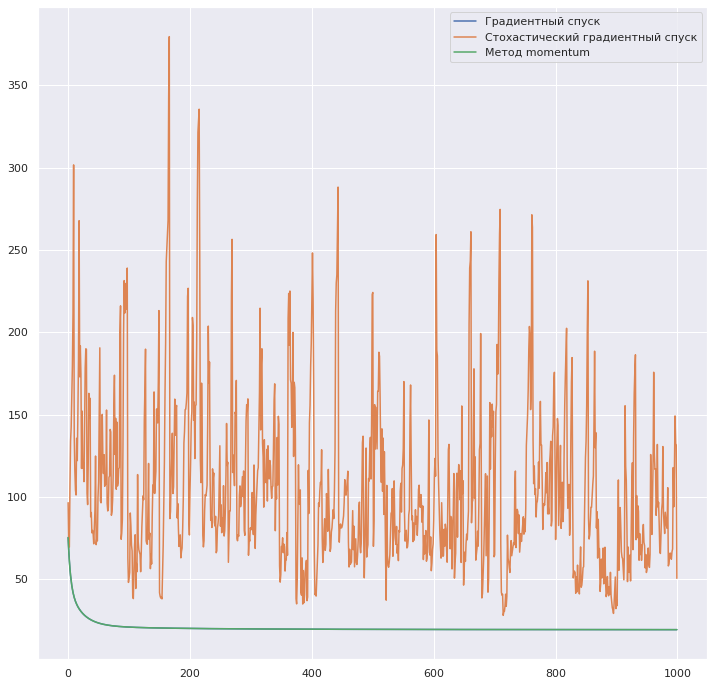

In [16]:
x_full = []
y_full = []
x_stochastic = []
y_stochastic = []
x_momentum = []
y_momentum = []

linreg_full = LinReg(gd_type='full')
model = linreg_full.fit(X_train_standart, y_train)
y_pred = model.predict(X_test_standart)

linreg_stochastic = LinReg(gd_type='stochastic')
model = linreg_stochastic.fit(X_train_standart, y_train)
y_pred = model.predict(X_test_standart)

linreg_momentum = LinReg(gd_type='momentum')
model = linreg_momentum.fit(X_train_standart, y_train)
y_pred = model.predict(X_test_standart)

plt.figure(figsize=(12, 12))
plt.plot(x_full, y_full, label='Градиентный спуск')
plt.plot(x_stochastic, y_stochastic, label='Стохастический градиентный спуск')
plt.plot(x_momentum, y_momentum, label='Метод momentum')
plt.legend()
plt.show()

Вывод: Если посмотреть на наш график, то мы можем заметить, что градиентный спуск и метод momentum одинаковые, по сравнению с Stochastic Gradient Descent